<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Carregando-Dados" data-toc-modified-id="Carregando-Dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Carregando Dados</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Investigando-Estrutura-HAC" data-toc-modified-id="Investigando-Estrutura-HAC-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Investigando Estrutura HAC</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#OPTICS" data-toc-modified-id="OPTICS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>OPTICS</a></span></li><li><span><a href="#GMM-+-KMEANS" data-toc-modified-id="GMM-+-KMEANS-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>GMM + KMEANS</a></span></li></ul></div>

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Carregando Dados

In [128]:
tb_cc = pd.read_csv('data/CCGENERAL.csv')
tb_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [227]:
tb_cc[tb_cc['BALANCE'] > 0].reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8870 entries, 0 to 8869
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             8870 non-null   int64  
 1   CUST_ID                           8870 non-null   object 
 2   BALANCE                           8870 non-null   float64
 3   BALANCE_FREQUENCY                 8870 non-null   float64
 4   PURCHASES                         8870 non-null   float64
 5   ONEOFF_PURCHASES                  8870 non-null   float64
 6   INSTALLMENTS_PURCHASES            8870 non-null   float64
 7   CASH_ADVANCE                      8870 non-null   float64
 8   PURCHASES_FREQUENCY               8870 non-null   float64
 9   ONEOFF_PURCHASES_FREQUENCY        8870 non-null   float64
 10  PURCHASES_INSTALLMENTS_FREQUENCY  8870 non-null   float64
 11  CASH_ADVANCE_FREQUENCY            8870 non-null   float64
 12  CASH_A

In [129]:
tb_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [130]:
X = tb_cc.dropna().copy()
X['TX_ONEOFF_PURCHASES'] = X['ONEOFF_PURCHASES']/X['PURCHASES']
X['TX_INST_PURCHASES'] = X['INSTALLMENTS_PURCHASES']/X['PURCHASES']

In [131]:
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TX_ONEOFF_PURCHASES,TX_INST_PURCHASES
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0.0,1.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,NaN,NaN
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1.0,0.0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1.0,0.0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0.0,1.0


In [132]:
X = X.drop(['CUST_ID','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES'],
               axis = 1).dropna().copy()
X = X[(X['TX_ONEOFF_PURCHASES'] < 1) & (X['TX_INST_PURCHASES'] < 1)]
clu_vars = X.columns

In [133]:
X.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'TX_ONEOFF_PURCHASES',
       'TX_INST_PURCHASES'],
      dtype='object')

# EDA

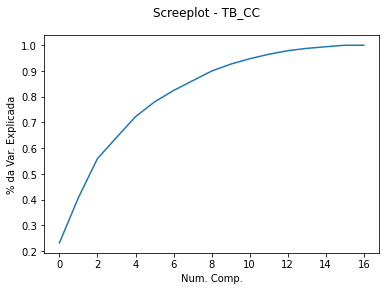

In [134]:
scaler = StandardScaler()
pca_fit = PCA().fit(scaler.fit_transform(X))
plt.plot(np.cumsum(pca_fit.explained_variance_ratio_));
plt.xlabel('Num. Comp.');
plt.ylabel('% da Var. Explicada');
plt.suptitle('Screeplot - TB_CC');

In [135]:
pca_7 = PCA(7)
pca_7.fit(scaler.fit_transform(X))
tb_cc_pca = pd.DataFrame(pca_7.transform(scaler.fit_transform(X)),
                         columns = ['PC_' + str(i) for i in range(1,8)])
clu_vars_pca = tb_cc_pca.columns

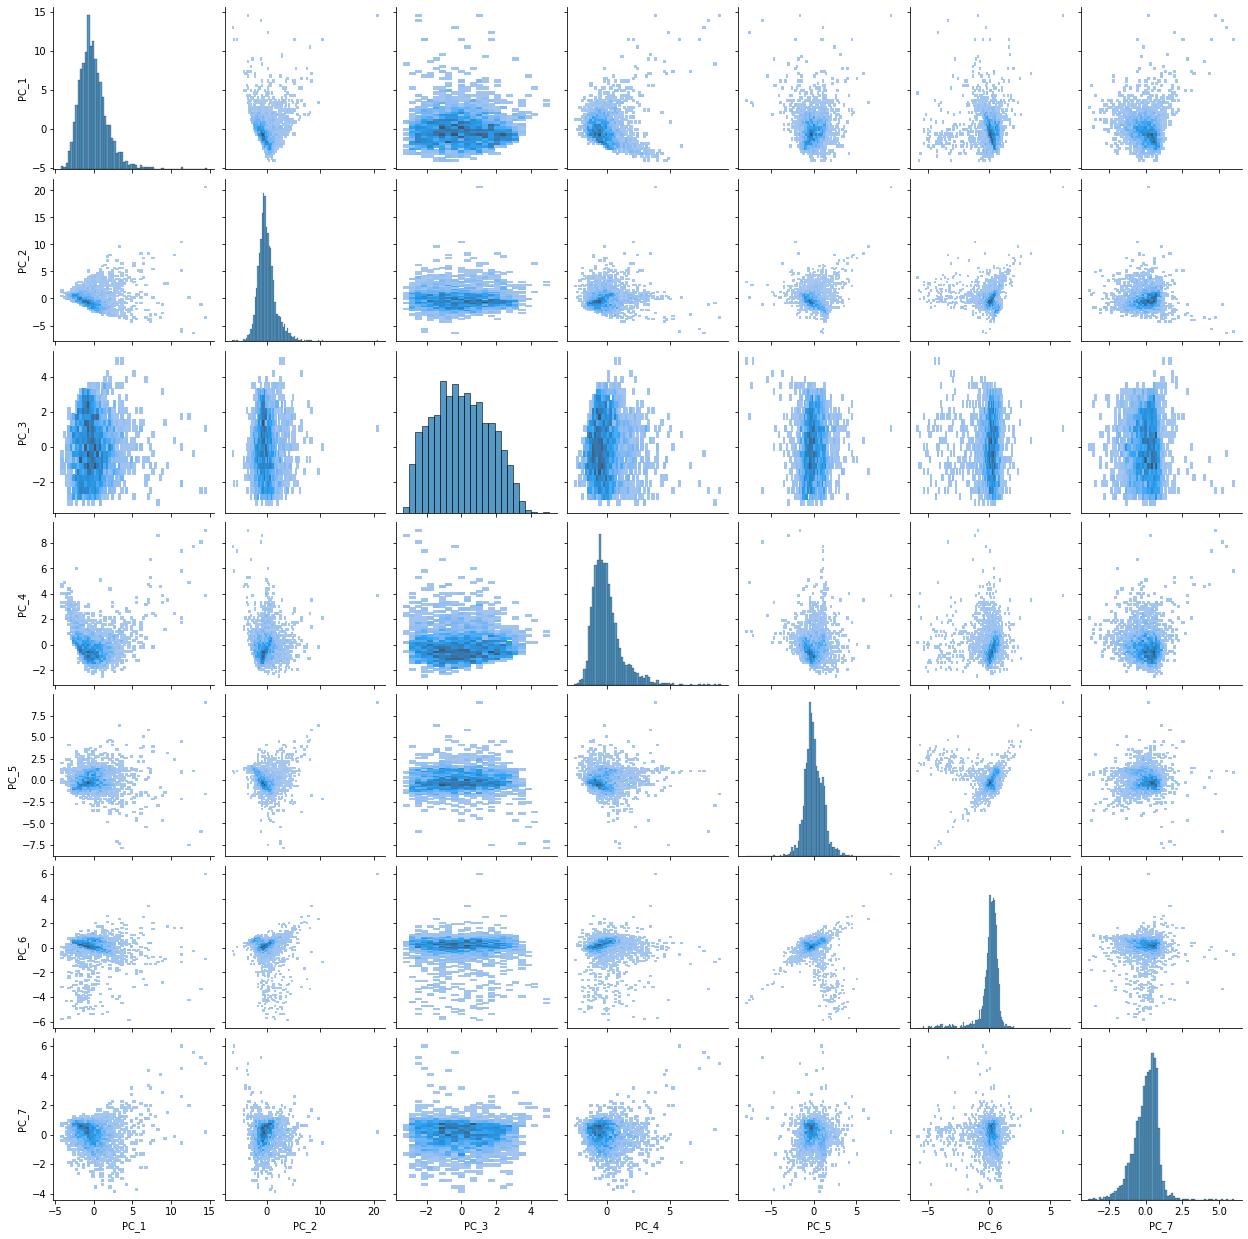

In [136]:
sns.pairplot(tb_cc_pca, kind = 'hist')

# Investigando Estrutura HAC

In [137]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [222]:
tb_cc_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PC_1        2740 non-null   float64
 1   PC_2        2740 non-null   float64
 2   PC_3        2740 non-null   float64
 3   PC_4        2740 non-null   float64
 4   PC_5        2740 non-null   float64
 5   PC_6        2740 non-null   float64
 6   PC_7        2740 non-null   float64
 7   cc_k5       2740 non-null   object 
 8   clu_dbscan  2740 non-null   object 
 9   clu_optics  2740 non-null   object 
dtypes: float64(7), object(3)
memory usage: 214.2+ KB


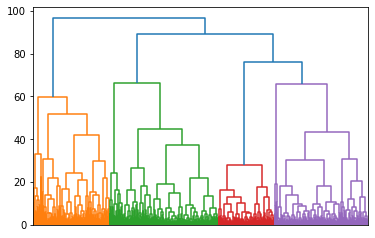

In [138]:
Z = linkage(tb_cc_pca[clu_vars_pca], method='ward')
dendrogram_ = dendrogram(Z, no_labels=True)

In [146]:
cc_k5 = AgglomerativeClustering(n_clusters = 7, linkage = 'ward').fit_predict(tb_cc_pca[clu_vars_pca])

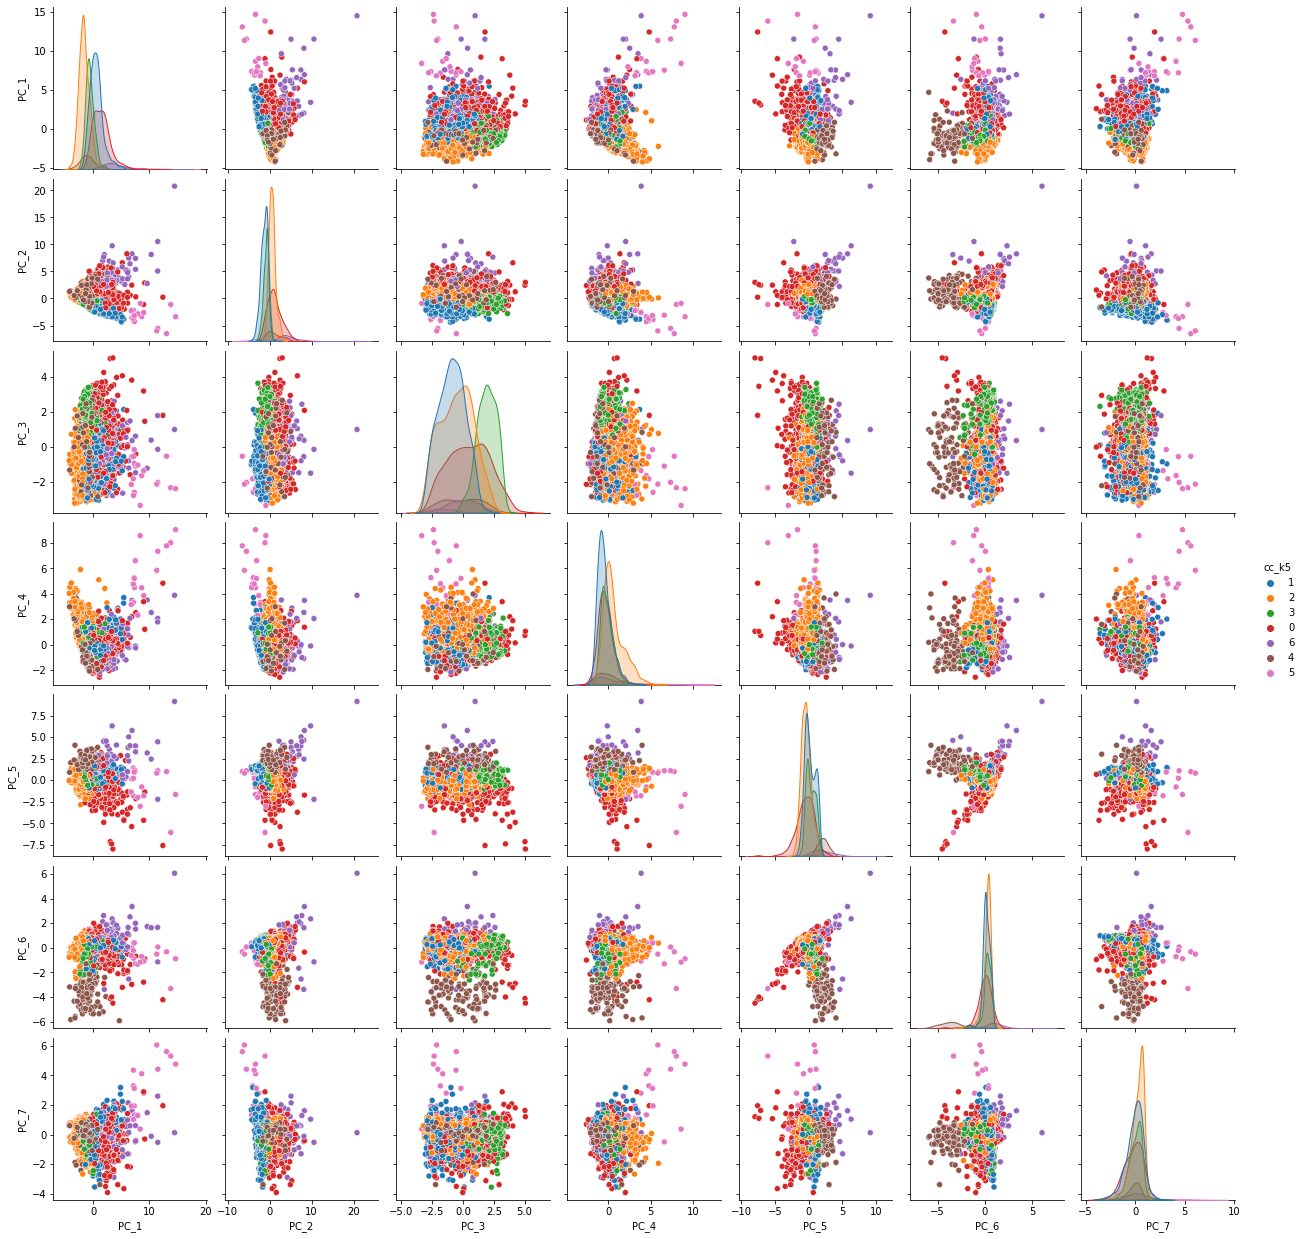

In [147]:
tb_cc_pca['cc_k5'] = [str(x) for x in cc_k5]
sns.pairplot(tb_cc_pca, vars = clu_vars_pca, hue = 'cc_k5')

In [149]:
loadings = pd.DataFrame(pca_7.components_.T,
                        columns=clu_vars_pca, 
                        index=X.columns)
loadings

ValueError: Shape of passed values is (17, 7), indices imply (18, 7)

In [150]:
X['cc_k5'] = [str(x) for x in cc_k5]

<AxesSubplot:xlabel='cc_k5', ylabel='PURCHASES_FREQUENCY'>

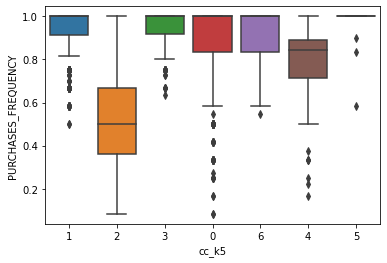

In [151]:
sns.boxplot(data = X, x = 'cc_k5', y = 'PURCHASES_FREQUENCY')

<AxesSubplot:xlabel='cc_k5', ylabel='TX_ONEOFF_PURCHASES'>

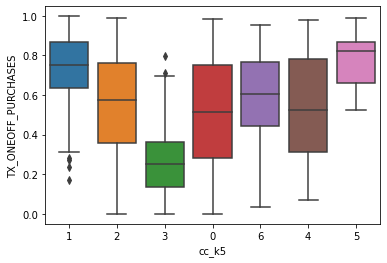

In [152]:
sns.boxplot(data = X, x = 'cc_k5', y = 'TX_ONEOFF_PURCHASES');

<AxesSubplot:xlabel='cc_k5', ylabel='TX_INST_PURCHASES'>

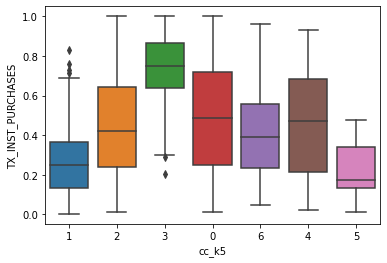

In [153]:
sns.boxplot(data = X, x = 'cc_k5', y = 'TX_INST_PURCHASES');

In [ ]:
fig, ax = plt.subplots(3, 6, figsize = (18, 20))
var_i = 0
for i in range(3):
    for j in range(6):
        sns.boxplot(data = tb_cc_gmm, x= 'clu_gmm', y = clu_vars[var_i], ax = ax[i,j])
        var_i += 1

# DBSCAN

In [161]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

In [176]:
for i in [50, 100, 150, 500, 1000]:
    neighbors = i
    nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X[clu_vars])
    distances, indices = nbrs.kneighbors(X[clu_vars])
    distance_desc = sorted(distances[:,-1], reverse=True)
    kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc,
                      S=1.0,
                      curve="convex",
                      direction="decreasing")
    print(f'Neigh = {i}, eps = {kneedle.knee_y}, rank_eps = {kneedle.knee/tb_cc_pca.shape[0]}')

Neigh = 50, eps = 10354.971610637622, rank_eps = 0.023722627737226276
Neigh = 100, eps = 11903.892253680078, rank_eps = 0.024452554744525547
Neigh = 150, eps = 10914.708036111102, rank_eps = 0.032846715328467155
Neigh = 500, eps = 12685.83691984326, rank_eps = 0.03905109489051095
Neigh = 1000, eps = 14711.588117797228, rank_eps = 0.03467153284671533


In [177]:
db = DBSCAN(eps= 14711, min_samples=1000)
tb_cc_pca['clu_dbscan'] = [str(x) for x in db.fit_predict(X[clu_vars])]
X['clu_dbscan'] = [str(x) for x in db.fit_predict(X[clu_vars])]

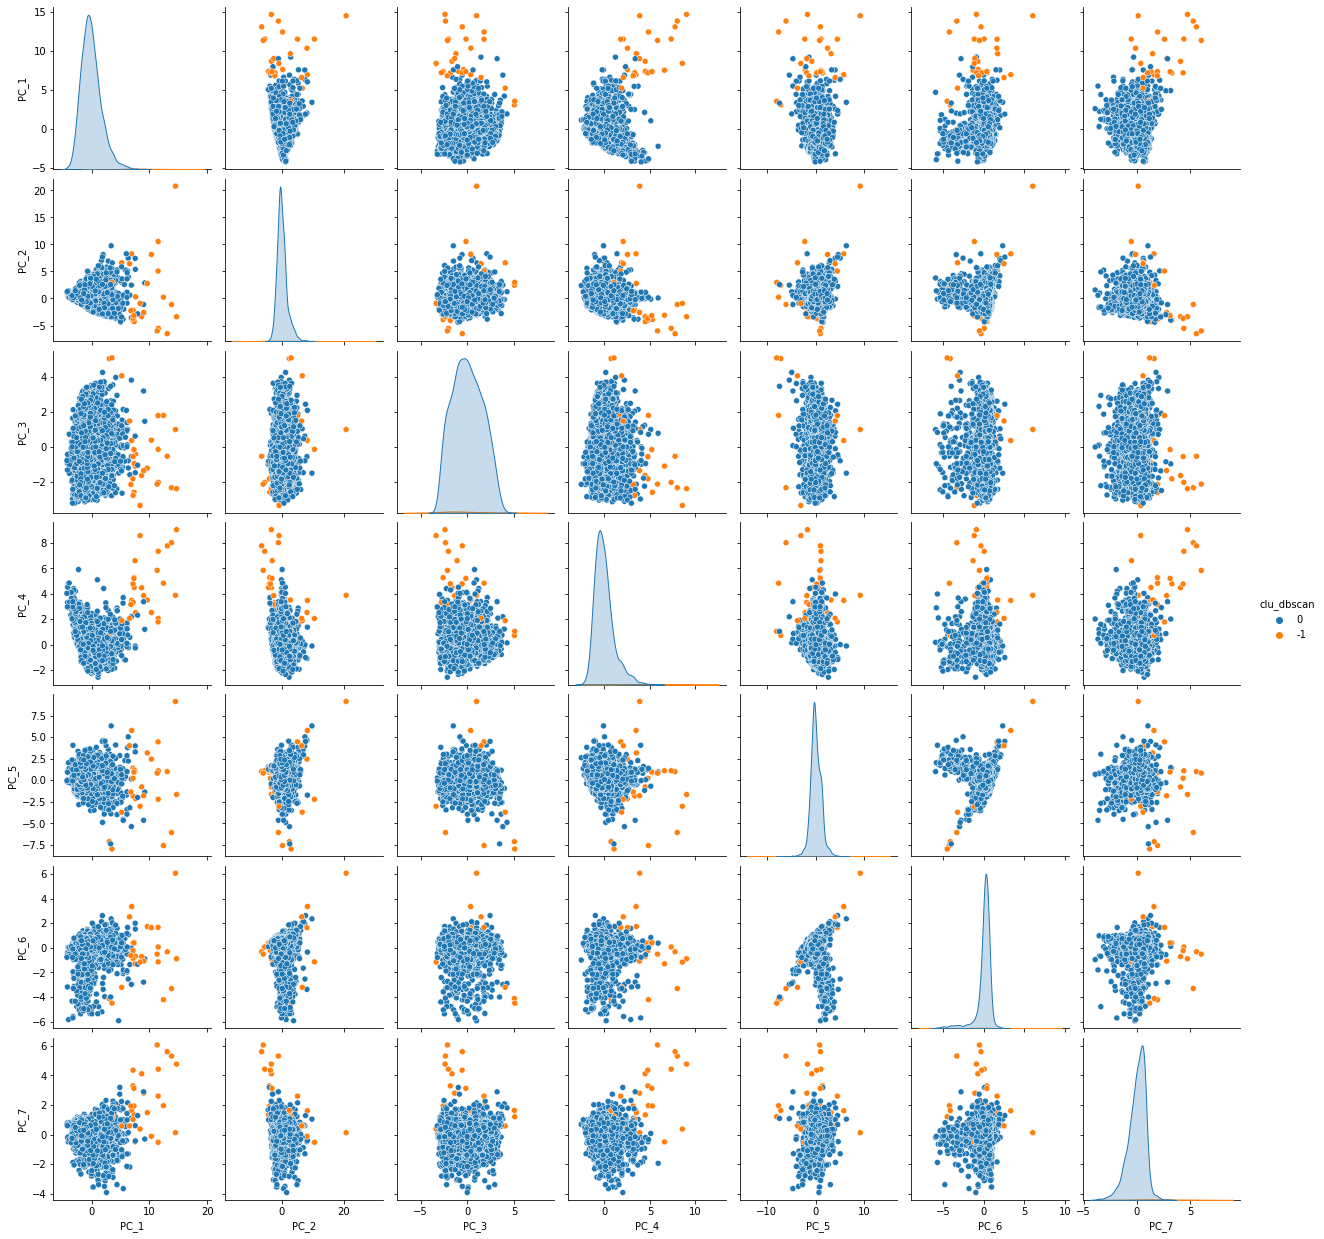

In [178]:
sns.pairplot(tb_cc_pca, vars = clu_vars_pca, hue = 'clu_dbscan')

Dataset muito densamente conectado - mas pode ser uma solução enquanto exclusão de outliers.

# OPTICS

In [179]:
from sklearn.cluster import OPTICS

In [180]:
optics = OPTICS(min_samples=1000)
tb_cc_pca['clu_optics'] = [str(x) for x in db.fit_predict(scaler.fit_transform(X[clu_vars]))]

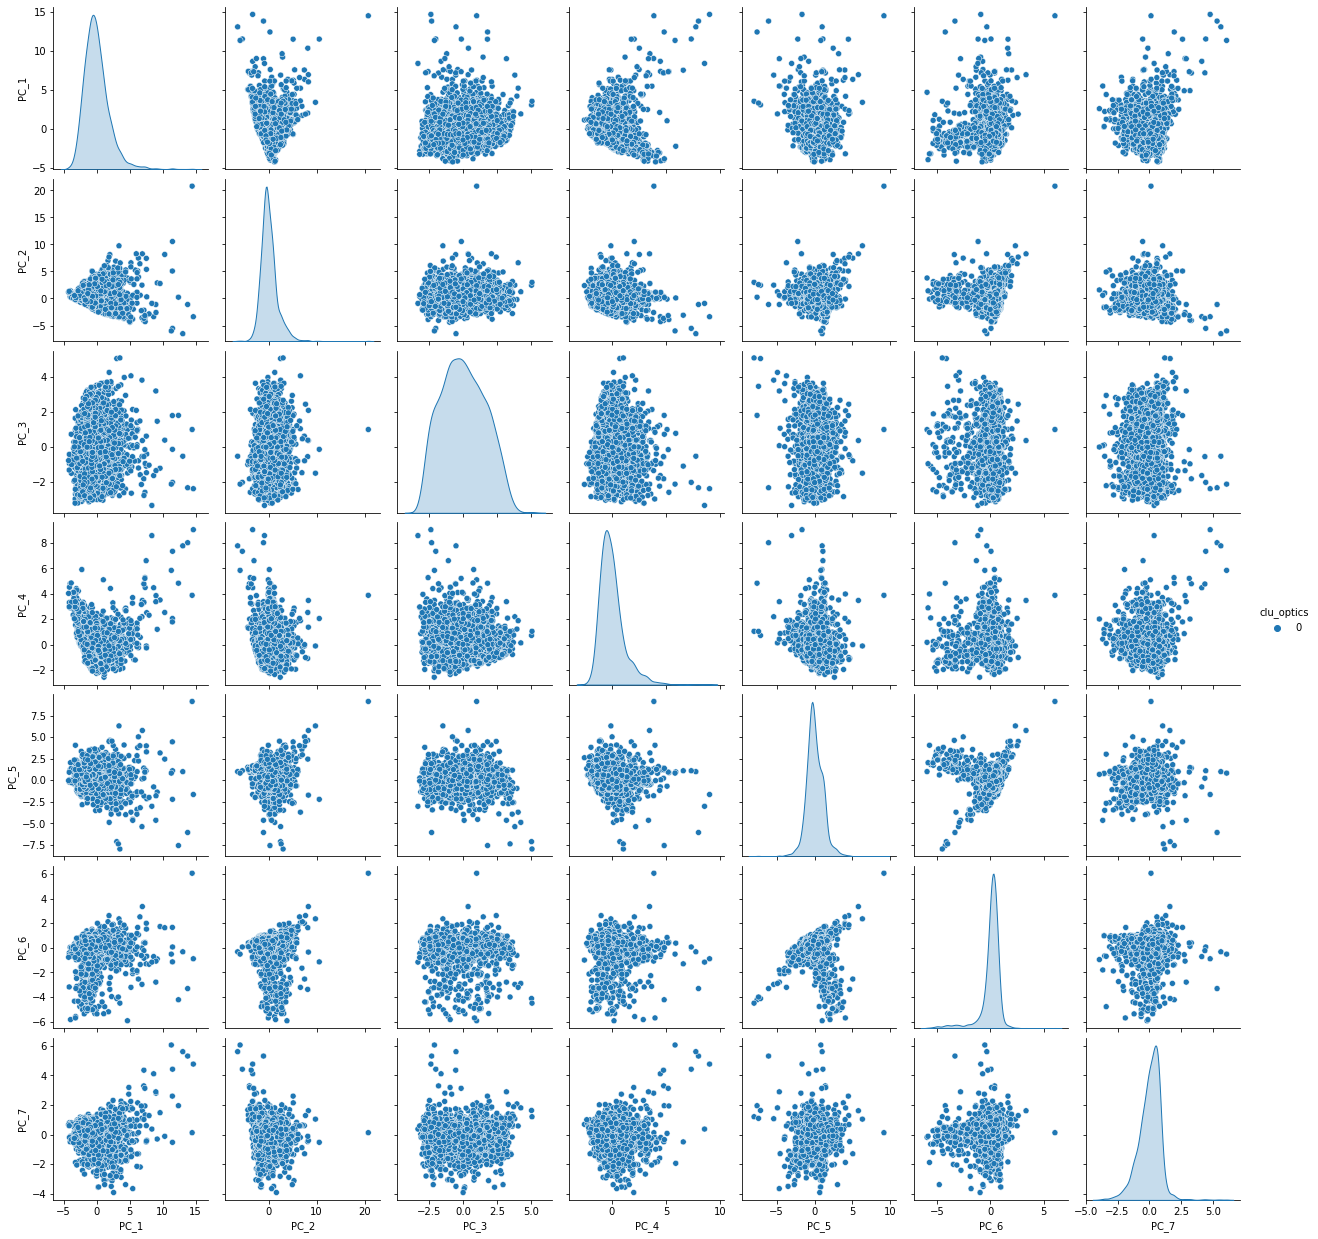

In [182]:
sns.pairplot(tb_cc_pca, vars = clu_vars_pca, hue = 'clu_optics')

# GMM + KMEANS

In [189]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

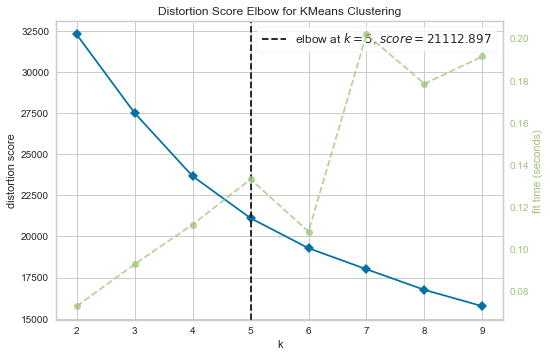

In [187]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(tb_cc_pca[clu_vars_pca])
visualizer.show();

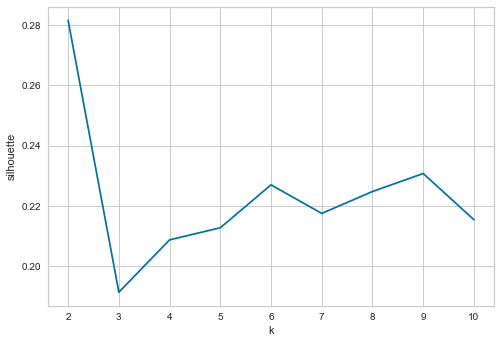

In [190]:
sil_list = []

for i in range(2, 11):
    clu_fit = KMeans(n_clusters = i)
    clu_fit.fit(tb_cc_pca[clu_vars_pca])
    sil = silhouette_score(tb_cc_pca[clu_vars_pca], clu_fit.labels_)
    sil_list.append(sil)
    
tb_inertia = pd.DataFrame({'k' : list(range(2, 11)), 'silhouette' : sil_list})
sns.lineplot(data = tb_inertia, x = 'k', y = 'silhouette');

In [208]:
gmm = GaussianMixture(n_components=6)
gmm.fit(scaler.fit_transform(X[clu_vars]))

GaussianMixture(n_components=6)

In [209]:
tb_cc_gmm = pd.concat([
    pd.DataFrame(gmm.predict_proba(scaler.fit_transform(X[clu_vars])),
                 columns=['c0', 'c1', 'c2', 'c3', 'c4', 'c5']), X[clu_vars].reset_index()
],
                         axis=1)
tb_cc_gmm['clu_gmm'] = [str(x) for x in gmm.predict(scaler.fit_transform(X[clu_vars]))]

In [210]:
tb_cc_gmm['certeza'] = np.max(tb_cc_gmm[['c0', 'c1', 'c2', 'c3', 'c4', 'c5']], axis = 1)

<AxesSubplot:xlabel='Density', ylabel='certeza'>

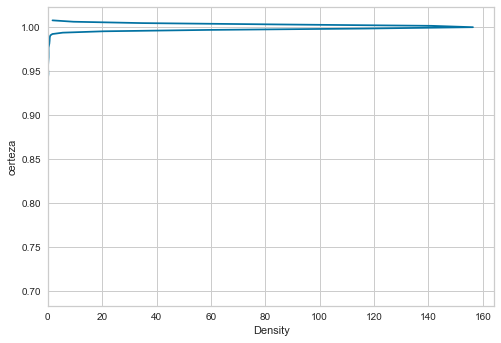

In [211]:
sns.kdeplot(data = tb_cc_gmm, y = 'certeza')

IndexError: index 17 is out of bounds for axis 0 with size 17

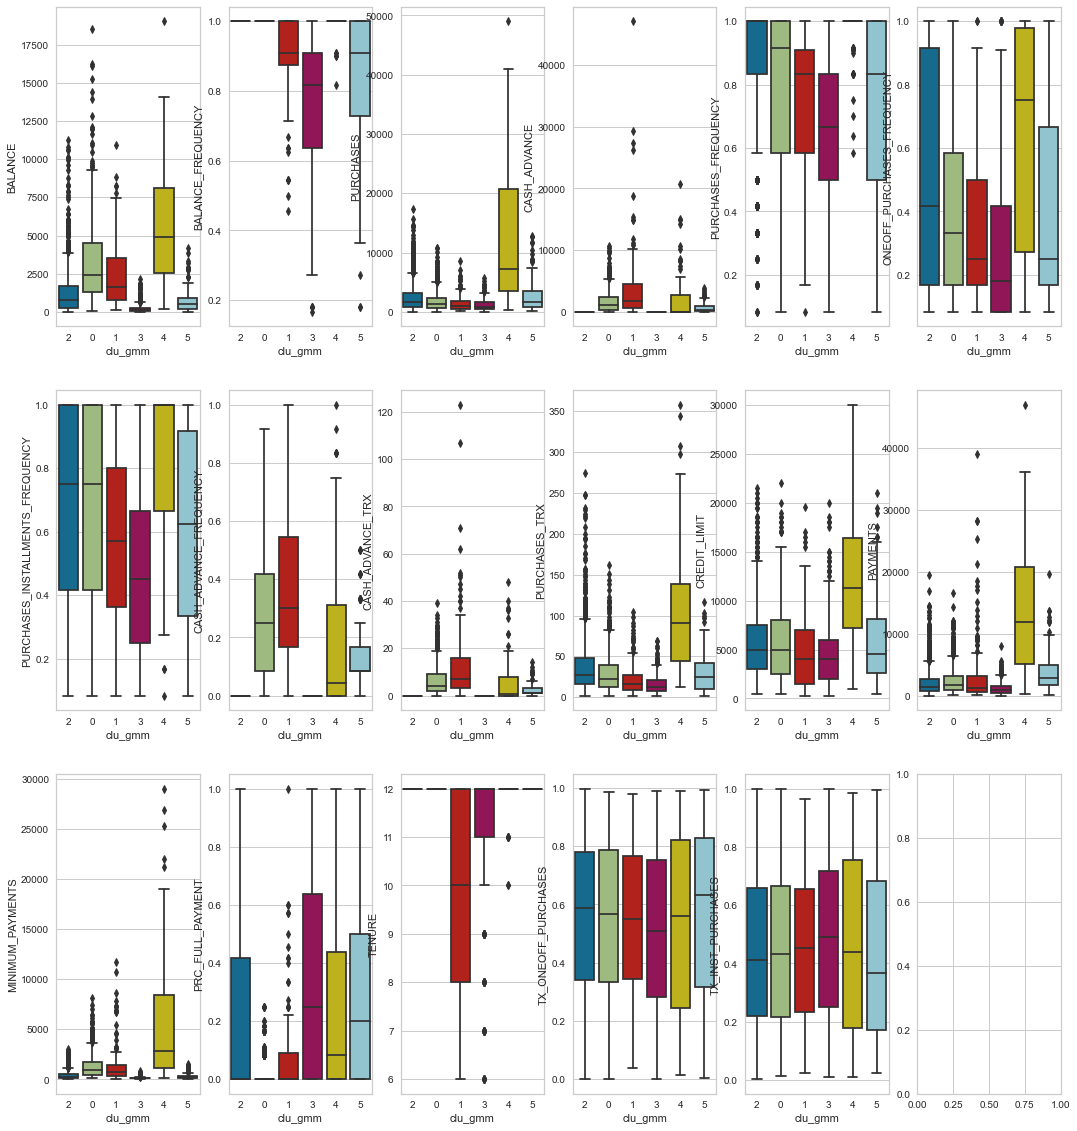

In [221]:
fig, ax = plt.subplots(3, 6, figsize = (18, 20))
var_i = 0
for i in range(3):
    for j in range(6):
        sns.boxplot(data = tb_cc_gmm, x= 'clu_gmm', y = clu_vars[var_i], ax = ax[i,j])
        var_i += 1

In [219]:
var_i

17